# line chart

In [8]:
import pandas as pd
df =pd.read_csv("data/pandas_sales.csv")
df

,month,eggs,salt,spam
0,Jan,47,12.0,17
1,Feb,110,50.0,31
2,Mar,221,89.0,72
3,Apr,77,87.0,20
4,May,132,NaN,52
5,Jun,205,60.0,55


## Month Vs eggs sales

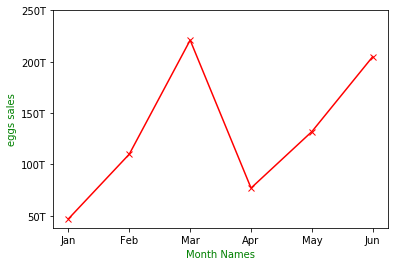

In [23]:
import matplotlib.pyplot as plt
plt.plot(df.month,df.eggs,'-xr')
plt.xlabel("Month Names",color ="green")
plt.ylabel("eggs sales",color ="green")
plt.yticks([50,100,150,200,250],["50T","100T","150T","200T","250T"])
plt.show()

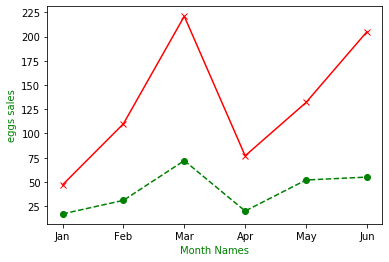

In [28]:
import matplotlib.pyplot as plt
plt.plot(df.month,df.eggs,'-xr')
plt.plot(df.month,df.spam,'--og')
plt.xlabel("Month Names",color ="green")
plt.ylabel("eggs sales",color ="green")
plt.show()

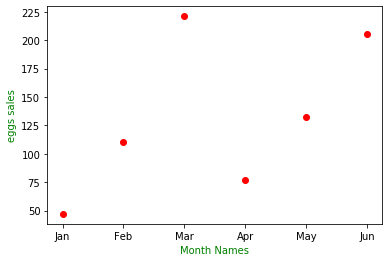

In [30]:
import matplotlib.pyplot as plt
plt.plot(df.month,df.eggs,'or')
plt.xlabel("Month Names",color ="green")
plt.ylabel("eggs sales",color ="green")
plt.show()

# ML Use case

In [33]:
df=pd.read_csv("data/auto-mpg.csv")
df.head()

,mpg,displ,hp,weight,accel,size
0,18.0,250.0,88,3139,14.5,15.0
1,9.0,304.0,193,4732,18.5,20.0
2,36.1,91.0,60,1800,16.4,10.0
3,18.5,250.0,98,3525,19.0,15.0
4,34.3,97.0,78,2188,15.8,10.0


In [34]:
# weight of the car incr ,what will happen to mpg ? 
## decr
# weight inversaly prop to mpg
# this relation i want to observe using scatter

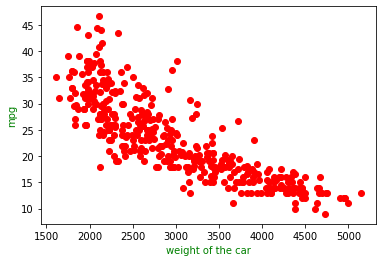

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df.weight,df.mpg,color="red")
plt.xlabel("weight of the car",color ="green")
plt.ylabel("mpg",color ="green")
plt.show()

In [5]:
import matplotlib.pyplot as plt
plt.plot?
# f --> color -->
# m -->marker 
# t -> linestyle

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,